# Imports

In [1]:
# Imports

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import scipy.stats as stats
import statistics
plt.style.use('ggplot')


import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import robust_scale
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn import datasets, linear_model
from sklearn import random_projection
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn import covariance
from sklearn.manifold import TSNE
from sklearn.neighbors.kde import KernelDensity as sclKDE
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from imblearn.under_sampling import RandomUnderSampler
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE



from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from scipy import interp
from sklearn.model_selection import KFold
from pylab import rcParams

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

from datetime import datetime
from IPython.display import display
import datetime as dt
import warnings
warnings.simplefilter('ignore')
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)


import requests
from requests.adapters import HTTPAdapter
import io
import os
import zipfile
import csv
import json
import pprint
import math

Using TensorFlow backend.


# Parsing the JSON file from the url and converting to a pandas dataframe

In [2]:
# Given url and adding raw=true, downloading the zip file with requests
import requests
url = 'https://github.com/CapitalOneRecruiting/DS/blob/master/transactions.zip?raw=true'

# download the file contents in binary format
response = requests.get(url)

# open method to open the transactions.zip file on my system and write the contents
open('transactions.zip', 'wb').write(response.content)

# assigning the filename to a variable
file_name = 'transactions.zip'


# opening Zip using 'with' keyword in read mode and extracting file
import zipfile
with zipfile.ZipFile(file_name, 'r') as file:
    file.extractall()
    
# Given that the file is array of JSONs, initialize an empty list transactions.
transactions = []

# parse the in line-delimited JSON file like a CSV using JSON parser to parse each line (using whatever delimiter is not in the file as it is JSON by line)
import csv
import json
with open('transactions.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='|')
    line_count = 0
    for row in csv_reader:
        transactions.append(json.loads(row[0])) 
        line_count += 1
    print("Processed {line_count} lines.".format(line_count=line_count))
    
#creating a pandas data frame
import pandas as pd
df = pd.DataFrame(transactions) 

Processed 786363 lines.


# Feature engineering and data preprocessing

In [3]:
# Complete the call to convert the date column
df['transactionDateTime'] =  pd.to_datetime(df['transactionDateTime'])

df['currentExpDate'] =  pd.to_datetime(df['currentExpDate'])

df['accountOpenDate'] =  pd.to_datetime(df['accountOpenDate'])

df['dateOfLastAddressChange'] =  pd.to_datetime(df['dateOfLastAddressChange'])


# Encode categorical variables

from sklearn.preprocessing import LabelEncoder
ToEncodeVars = ['accountNumber', 'customerId','merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode','transactionType', 'echoBuffer', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch','cardCVV', 'enteredCVV', 'cardLast4Digits', 'isFraud']
enc=LabelEncoder()


# Transform categorical qualitative data into labels
for i in ToEncodeVars:
    df[[i]] = enc.fit_transform(df[[i]])

enc_data=df.iloc[:,:]

# Dropping less important variables 
data = enc_data.drop(columns=['currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange', 'accountNumber', 'customerId', 'acqCountry', 'merchantCountryCode', 
                              'posEntryMode', 'posConditionCode', 'echoBuffer', 'currentBalance', 'merchantCity','merchantState', 'merchantZip', 'posOnPremises',
                              'recurringAuthInd', 'expirationDateKeyInMatch', 'availableMoney', 'enteredCVV'])


# Feature engineering: Converting datetime to a new field seconds

startTime = data.transactionDateTime.loc[0]
endTime = data.transactionDateTime.loc[1]
position = data.columns.get_loc('transactionDateTime')
data['elapsed'] =  data.iloc[1:, position] - data.iat[0, position]
seconds=data.elapsed.dt.total_seconds() 
data['seconds'] = seconds
data = data.drop(columns=['transactionDateTime', 'elapsed'])
dataset = data.drop(columns=['isFraud']).fillna(0)
target = data['isFraud'].fillna(0)

# Preparing the dataset and target variables

In [4]:
dataset = data.drop(columns=['isFraud']).fillna(0)
target = data['isFraud'].fillna(0)


# Splitting the Dataset and target into Break set and Testing set and stratifying for the minority class


X_break, X_test, y_break, y_test = train_test_split(dataset, target, \
                                                    test_size=0.2, stratify=df['isFraud'],
                                                    random_state=42)

# Splitting the Break set into training andvalidation set
X_train, X_val, y_train, y_val = train_test_split(X_break, y_break, \
                                                    test_size=0.25, stratify=y_break,
                                                    random_state=42)

# Standardize for the long tail of Dataset
std_scale = StandardScaler().fit(X_train)

# Scale data
X_train_std = std_scale.transform(X_train)
X_val_std = std_scale.transform(X_val)
X_test_std = std_scale.transform(X_test)

# Use Random undersampler from the majority class to correct for Imbalanced class model
X_train_under, y_train_under = RandomUnderSampler(random_state=42).fit_sample(X_train_std,y_train)
X_val_under, y_val_under = RandomUnderSampler(random_state=42).fit_sample(X_val_std,y_val)

# Classification algorithms

In [6]:
# Cross-Validation with logit

penalty = ['l2']
C = np.logspace(0, 4, 10, 100, 1000)
param_grid = dict(C=C, penalty=penalty)

logistic = linear_model.LogisticRegression(solver='lbfgs', max_iter=10000)
logistic_grid = GridSearchCV(logistic, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
logistic_grid.fit(X_train_under, y_train_under)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1956s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:    1.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.15443469e+01, 4.64158883e+02, 1.00000000e+04,
       2.15443469e+05, 4.64158883e+06, 1.00000000e+08, 2.15443469e+09,
       4.64158883e+10, 1.00000000e+12]),
                         'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
        

In [7]:
# save the model to disk
filename = 'logistic_grid.sav'
pickle.dump(logistic_grid, open(filename, 'wb'))
 
# load the model from disk
loaded_logistic_grid_model= pickle.load(open(filename, 'rb'))
result = loaded_logistic_grid_model.score(X_test_std, y_test)
print(result)

0.6816651102033526


In [8]:
# Cross Validation with 5 folds SVM

C = [1]
gammas = [0.001, 0.1] 
param_grid = dict(C=C, gamma=gammas)
svm1 = svm.SVC(kernel='rbf', probability=True)
svm_grid = GridSearchCV(svm1, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
svm_grid.fit(X_train_under, y_train_under)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:  1.3min remaining:  3.0min
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:  1.3min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  1.3min remaining:   34.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1], 'gamma': [0.001, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=10)

In [9]:
# save the model to disk
filename = 'svm_grid.sav'
pickle.dump(svm_grid, open(filename, 'wb'))
 
# load the model from disk
loaded_svm_grid_model= pickle.load(open(filename, 'rb'))
result = loaded_svm_grid_model.score(X_test_std, y_test)
print(result)

0.7186171814972733


In [10]:
# Cross Validation with Random Forest

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt'],
    'min_samples_leaf': [10, 20],
    'min_samples_split': [2, 5],
    'n_estimators': [500, 700]
}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
rf_grid.fit(X_train_under,y_train_under)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:  7.0min remaining:    7.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  7.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [11]:
# save the model to disk
filename = 'rf_grid.sav'
pickle.dump(rf_grid, open(filename, 'wb'))
 
# load the model from disk
loaded_rf_grid_model= pickle.load(open(filename, 'rb'))
result = loaded_rf_grid_model.score(X_test_std, y_test)
print(result)

0.7911654642745812


In [12]:
# Naive Bayes Classifier Model

gnb = GaussianNB()
gnb_best = gnb.fit(X_train_under, y_train_under)


# save the model to disk
filename = 'gnb_best.sav'
pickle.dump(gnb_best, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_gnb_model= pickle.load(open(filename, 'rb'))
result = loaded_gnb_model.score(X_test_std, y_test)
print(result)



0.5219777075531082


In [13]:
# Baseline Dummy Classifier
dummy = DummyClassifier()
dummy.fit(X_train_under, y_train_under)

# save the model to disk
filename = 'dummy.sav'
pickle.dump(dummy, open(filename, 'wb'))
 
# load the model from disk
loaded_dummy_model= pickle.load(open(filename, 'rb'))
result = loaded_dummy_model.score(X_test_std, y_test)
print(result)



0.49992052036903983


# Evaluating performance

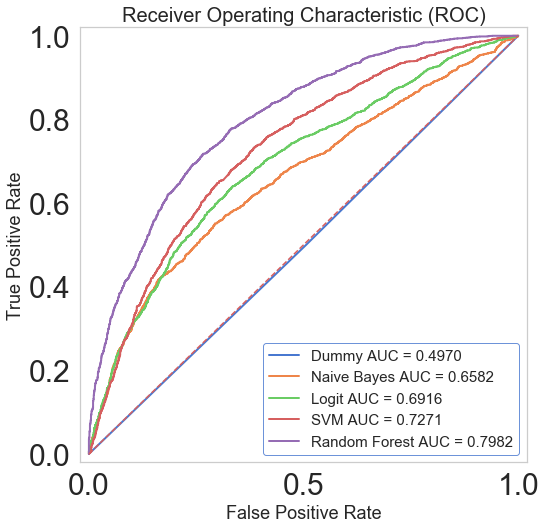

In [14]:
# Calculating ROC-AUC Scores
def roc_scores(X_value, Y_value):
    #in sample
    model_list = [dummy,
                  gnb_best,
                  logistic_grid.best_estimator_, 
                  svm_grid.best_estimator_, 
                  rf_grid.best_estimator_
                  ]

    model_name = ['Dummy', 'Naive Bayes','Logit','SVM','Random Forest',]

    # Plot ROC curve for all my models
    fig, ax = plt.subplots(figsize=(8,8))
    for i, model in enumerate(model_list):
        y_pred = list(model.predict_proba(X_value)[:,1])
        fpr, tpr, threshold = metrics.roc_curve(Y_value, y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, label = (model_name[i] + ' AUC = %0.4f' % roc_auc),linewidth=2.0)
    ax.grid(False)
    ax.tick_params(length=6, width=2,labelsize = 30,
                   grid_color='r', grid_alpha=0.5)
    leg = plt.legend(loc = 'lower right',prop={'size': 15})
    leg.get_frame().set_edgecolor('b')
    plt.title('Receiver Operating Characteristic (ROC)', FontSize=20)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-.02, 1.02])
    plt.ylim([-.02, 1.02])
    plt.ylabel('True Positive Rate',FontSize=18)
    plt.xlabel('False Positive Rate',FontSize=18)
    plt.show()
    
roc_scores(X_val_under,y_val_under)

In [15]:
def find_best_threshold(model, int_num_steps):
    highest_f1 = 0
    best_threshold = 0
    for threshold in np.linspace (0, 1, int_num_steps):
        y_predict = (model.predict_proba(X_val_under)[:, 1] >= threshold) 
        f1 = f1_score(y_val_under,y_predict)
        acc = accuracy_score(y_val_under,y_predict)
        rec = recall_score(y_val_under,y_predict)
        pre = precision_score(y_val_under,y_predict)
        if f1 > highest_f1:
            best_threshold, highest_f1, best_acc, best_rec, best_pre  = \
                threshold, f1, acc, rec, pre
    return best_threshold, highest_f1, best_acc, best_rec, best_pre

# Performance matrix

In [16]:
#Performance chart
models = [dummy,logistic_grid, gnb_best, svm_grid, rf_grid]
model_names = ["Dummy",  "Logistic Regression", "Naive-Bayes", "SVM", "Random Forest"]
chart = list()
for item,name in zip(models,model_names):
    best_thresh, high_f1, high_acc, high_rec, high_pre = find_best_threshold(item,20)
    chart.append([name, best_thresh, high_f1, high_acc, high_rec, high_pre])
chart = pd.DataFrame(chart, columns=['Model', 'Best Threshhold','F1 Score','Accuracy','Recall','Precision'])    
chart

,Model,Best Threshhold,F1 Score,Accuracy,Recall,Precision
0,Dummy,0.000000,0.666667,0.500000,1.000000,0.500000
1,Logistic Regression,0.315789,0.678091,0.561393,0.923913,0.535589
2,Naive-Bayes,0.000000,0.666667,0.500000,1.000000,0.500000
3,SVM,0.315789,0.702807,0.629227,0.876812,0.586430
4,Random Forest,0.421053,0.739833,0.705113,0.838567,0.661900


# Cost savings with cost-sensitive loss functions

#Cost-sensitive learning: I assign each class a misclassification cost instead of each sample being either correctly or incorrectly classified,. Thus, I optimize on the total misclassification cost.

In [16]:
# Data preparation
#data_cost_saving = df.drop(columns = ['accountNumber', 'customerId', 
       'transactionDateTime', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'transactionType', 'echoBuffer', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch'])
target = df['isFraud']
X_break, X_test, y_break, y_test = train_test_split(data_cost_saving, target, \
                                                    test_size=0.2, stratify=df['isFraud'],
                                                    random_state=42)

#random_state generates a set kind of deck for each random state. 42 will always be the same kind of split
X_train, X_val, y_train, y_val = train_test_split(X_break, y_break, \
                                                    test_size=0.25, stratify=y_break,
                                                    random_state=42)
# Initialize fit StandardScaler
std_scale = StandardScaler().fit(X_train)

# Scale data
X_train_std = std_scale.transform(X_train)
X_val_std = std_scale.transform(X_val)
X_test_std = std_scale.transform(X_test)

dataset = data_cost_saving.drop(columns=['isFraud','creditLimit']).fillna(0)
target = data_cost_saving['isFraud'].fillna(0)

In [33]:
# Defining data and classification costs
import ANN, eval_results

X = dataset
y = target
sc = StandardScaler()
X = sc.fit_transform(X)

amount = dataset['transactionAmount']
cost_FP = 1
cost_FN = amount
cost_TP = 1
cost_TN = 0
cost_mat = np.array([cost_FP * np.ones(dataset.shape[0]), cost_FN, 
                     cost_TP * np.ones(dataset.shape[0]), 
                     cost_TN * np.ones(dataset.shape[0])]).T

In [34]:
# Data into train / test splits (5-fold CV):
n_splits = 5
kf = KFold(n_splits=n_splits, random_state=123, shuffle=True)
kf.get_n_splits(X)
X_train_l, X_test_l = [], []
y_train_l, y_test_l = [], []
cost_mat_train_l, cost_mat_test_l = [], []
for train_index, test_index in kf.split(X):
    X_train_l.append(X[train_index, :])
    X_test_l.append(X[test_index, :])
    y_train_l.append(y.iloc[train_index])
    y_test_l.append(y.iloc[test_index])
    cost_mat_train_l.append(cost_mat[train_index, :])
    cost_mat_test_l.append(cost_mat[test_index, :])

In [35]:
# Random model 2 #
y_pred_train_rand, y_pred_test_rand = [], []
print('Random Model ...')
for y_train, y_test in zip(y_train_l, y_test_l):
    y_pos_train = y_train.sum() / y_train.shape[0]
    y_pred_train_rand.append(np.random.binomial(1, y_pos_train, y_train.shape[0]))
    y_pred_test_rand.append(np.random.binomial(1, y_pos_train, y_test.shape[0]))

Random Model ...


In [36]:
# Logistic Regression #
y_pred_train_lr_probas, y_pred_test_lr_probas = [], []
y_pred_train_lr, y_pred_test_lr = [], []
for i, (X_train, X_test, y_train) in enumerate(zip(X_train_l, X_test_l, y_train_l)):
    print('Logistic regression ' + str(i + 1) + '/' + str(n_splits) + ' ...')
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred_train_lr_probas.append(np.round(lr.predict_proba(X_train)[:, 1], 3))
    y_pred_test_lr_probas.append(np.round(lr.predict_proba(X_test)[:, 1], 3))
    y_pred_train_lr.append(lr.predict(X_train))
    y_pred_test_lr.append(lr.predict(X_test))

Logistic regression 1/5 ...
Logistic regression 2/5 ...
Logistic regression 3/5 ...
Logistic regression 4/5 ...
Logistic regression 5/5 ...


In [37]:
# ANN #
y_pred_train_ann_probas, y_pred_test_ann_probas = [], []
y_pred_train_ann, y_pred_test_ann = [], []
for i, (X_train, X_test, y_train) in enumerate(zip(X_train_l, X_test_l, y_train_l)):
    print('ANN ' + str(i + 1) + '/' + str(n_splits) + ' ...')
    clf = ANN.clf(indput_dim=X_train.shape[1], dropout=0.2)
    clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    clf.fit(X_train, y_train, batch_size=50, epochs=2, verbose=1)
    y_pred_train_ann_proba = np.round(clf.predict(X_train, verbose=1), 3).reshape(-1)
    y_pred_test_ann_proba = np.round(clf.predict(X_test, verbose=1), 3).reshape(-1)
    y_pred_train_ann_probas.append(y_pred_train_ann_proba)
    y_pred_test_ann_probas.append(y_pred_test_ann_proba)
    y_pred_train_ann.append((y_pred_train_ann_proba > 0.5).astype(int).reshape(-1))
    y_pred_test_ann.append((y_pred_test_ann_proba > 0.5).astype(int).reshape(-1))

ANN 1/5 ...
Epoch 1/2
629090/629090 [==============================] - 26s 42us/step - loss: 0.0827 - accuracy: 0.9842
Epoch 2/2
157273/157273 [==============================] - 3s 21us/step
ANN 2/5 ...
Epoch 1/2
629090/629090 [==============================] - 47s 74us/step - loss: 0.0818 - accuracy: 0.9842
Epoch 2/2
157273/157273 [==============================] - 3s 18us/step
ANN 3/5 ...
Epoch 1/2
629090/629090 [==============================] - 33s 53us/step - loss: 0.0825 - accuracy: 0.9841
Epoch 2/2
157273/157273 [==============================] - 3s 20us/step
ANN 4/5 ...
Epoch 1/2
629091/629091 [==============================] - 37s 59us/step - loss: 0.0824 - accuracy: 0.9842
Epoch 2/2
157272/157272 [==============================] - 2s 14us/step
ANN 5/5 ...
Epoch 1/2
629091/629091 [==============================] - 28s 45us/step - loss: 0.0827 - accuracy: 0.9841
Epoch 2/2
157272/157272 [==============================] - 3s 16us/step


In [38]:
# Cost Sensitive #
y_pred_train_ann_cs_probas, y_pred_test_ann_cs_probas = [], []
y_pred_train_ann_cs, y_pred_test_ann_cs = [], []
for i, (X_train, X_test, y_train, cost_mat_train) in enumerate(zip(X_train_l, 
                                   X_test_l, y_train_l, cost_mat_train_l)): 
    print('ANN Cost Sensitive ' + str(i + 1) + '/' + str(n_splits) + ' ...')
    cost_FN_train = cost_mat_train[:, 1]
    y_input = ANN.create_y_input(y_train, cost_FN_train).apply(float)
    clf = ANN.clf(indput_dim=X_train.shape[1], dropout=0.2)
    clf.compile(optimizer='adam', loss=ANN.custom_loss(cost_FP, cost_TP, cost_TN),
                metrics=['accuracy'])
    clf.fit(X_train, y_input, batch_size=50, epochs=2, verbose=1)
    y_pred_train_ann_cs_proba = clf.predict(X_train, verbose=1)
    y_pred_test_ann_cs_proba = clf.predict(X_test, verbose=1)
    y_pred_train_ann_cs_probas.append(y_pred_train_ann_cs_proba)
    y_pred_test_ann_cs_probas.append(y_pred_test_ann_cs_proba)
    y_pred_train_ann_cs.append((y_pred_train_ann_cs_proba > 0.5).\
                               astype(int).reshape(-1))
    y_pred_test_ann_cs.append((y_pred_test_ann_cs_proba > 0.5).\
                              astype(int).reshape(-1))

ANN Cost Sensitive 1/5 ...
Epoch 1/2
629090/629090 [==============================] - 31s 50us/step - loss: 1.7062 - accuracy: 0.0332
Epoch 2/2
157273/157273 [==============================] - 3s 17us/step
ANN Cost Sensitive 2/5 ...
Epoch 1/2
629090/629090 [==============================] - 30s 48us/step - loss: 1.6981 - accuracy: 0.0335
Epoch 2/2
157273/157273 [==============================] - 2s 13us/step
ANN Cost Sensitive 3/5 ...
Epoch 1/2
629090/629090 [==============================] - 28s 45us/step - loss: 1.7051 - accuracy: 0.0336
Epoch 2/2
157273/157273 [==============================] - 8s 48us/step
ANN Cost Sensitive 4/5 ...
Epoch 1/2
629091/629091 [==============================] - 76s 120us/step - loss: 1.7108 - accuracy: 0.0334
Epoch 2/2
157272/157272 [==============================] - 3s 18us/step
ANN Cost Sensitive 5/5 ...
Epoch 1/2
629091/629091 [==============================] - 26s 42us/step - loss: 1.7080 - accuracy: 0.0334
Epoch 2/2
157272/157272 [================

In [39]:
# cost-classification Logistic Regression classified according to expected minimum costs (mc)
y_pred_train_lr_mc, y_pred_test_lr_mc = [], []
for y_train_proba, y_test_proba, cm_train, cm_test in zip(y_pred_train_lr_probas,\
                            y_pred_test_lr_probas, cost_mat_train_l, cost_mat_test_l):
    cost_0 = (1 - y_train_proba) * cm_train[:, 3] + y_train_proba * cm_train[:, 1]
    cost_1 = (1 - y_train_proba) * cm_train[:, 0] + y_train_proba * cm_train[:, 2]
    y_pred_train_lr_mc.append((cost_1 < cost_0).astype(int))        
    cost_0 = (1 - y_test_proba) * cm_test[:, 3] + y_test_proba * cm_test[:, 1]
    cost_1 = (1 - y_test_proba) * cm_test[:, 0] + y_test_proba * cm_test[:, 2]
    y_pred_test_lr_mc.append((cost_1 < cost_0).astype(int))

In [40]:
# cost-classified ANN classified according to expected minimum costs (mc)
y_pred_train_ann_mc, y_pred_test_ann_mc = [], []
for y_train_proba, y_test_proba, cm_train, cm_test in zip(y_pred_train_ann_probas,\
                            y_pred_test_ann_probas, cost_mat_train_l, cost_mat_test_l):
    cost_0 = (1 - y_train_proba) * cm_train[:, 3] + y_train_proba * cm_train[:, 1]
    cost_1 = (1 - y_train_proba) * cm_train[:, 0] + y_train_proba * cm_train[:, 2]
    y_pred_train_ann_mc.append((cost_1 < cost_0).astype(int))  
    cost_0 = (1 - y_test_proba) * cm_test[:, 3] + y_test_proba * cm_test[:, 1]
    cost_1 = (1 - y_test_proba) * cm_test[:, 0] + y_test_proba * cm_test[:, 2]
    y_pred_test_ann_mc.append((cost_1 < cost_0).astype(int))

In [41]:
# ---------- Save results ---------- #
np.save('results/cost_mat_train_l', cost_mat_train_l)
np.save('results/cost_mat_test_l', cost_mat_test_l)
np.save('results/y_pred_train_lr.npy', y_pred_train_lr)
np.save('results/y_pred_test_lr.npy', y_pred_test_lr)
np.save('results/y_pred_train_lr_probas.npy', y_pred_train_lr_probas)
np.save('results/y_pred_test_lr_probas.npy', y_pred_test_lr_probas)
np.save('results/y_pred_train_ann.npy', y_pred_train_ann)
np.save('results/y_pred_test_ann.npy', y_pred_test_ann)
np.save('results/y_pred_train_ann_probas.npy', y_pred_train_ann_probas)
np.save('results/y_pred_test_ann_probas.npy', y_pred_test_ann_probas)
np.save('results/y_pred_train_ann_cs.npy', y_pred_train_ann_cs)
np.save('results/y_pred_test_ann_cs.npy', y_pred_test_ann_cs)
np.save('results/y_pred_train_ann_cs_probas.npy', y_pred_train_ann_cs_probas)
np.save('results/y_pred_test_ann_cs_probas.npy', y_pred_test_ann_cs_probas)
np.save('results/y_pred_train_lr_mc.npy', y_pred_train_lr_mc)
np.save('results/y_pred_test_lr_mc.npy', y_pred_test_lr_mc)
np.save('results/y_pred_train_ann_mc.npy', y_pred_train_ann_mc)
np.save('results/y_pred_test_ann_mc.npy', y_pred_test_ann_mc)

In [42]:
# Evaluate results #
eval_results.evaluate('Random', y_train_l, y_test_l, y_pred_train_rand, y_pred_test_rand,
                      cost_mat_train_l, cost_mat_test_l)
eval_results.evaluate('Logistic Regression', y_train_l, y_test_l, y_pred_train_lr, 
                      y_pred_test_lr, cost_mat_train_l, cost_mat_test_l)
eval_results.evaluate('ANN', y_train_l, y_test_l, y_pred_train_ann, y_pred_test_ann,
                      cost_mat_train_l, cost_mat_test_l)
eval_results.evaluate('ANN Cost Sensitive', y_train_l, y_test_l, y_pred_train_ann_cs, 
                      y_pred_test_ann_cs, cost_mat_train_l, cost_mat_test_l)
eval_results.evaluate('Logistic Regression (min costs)', y_train_l, y_test_l, 
                      y_pred_train_lr_mc, y_pred_test_lr_mc, cost_mat_train_l, 
                      cost_mat_test_l)
eval_results.evaluate('ANN (min costs)', y_train_l, y_test_l, y_pred_train_ann_mc,
                      y_pred_test_ann_mc, cost_mat_train_l, cost_mat_test_l)


--------------------
Random
Positives train     0.016, individual: [0.016, 0.016, 0.016, 0.016, 0.016]
Positives test:     0.016, individual: [0.016, 0.016, 0.016, 0.017, 0.016]
F1-score train:     0.016, individual: [0.016, 0.015, 0.017, 0.017, 0.016]
F1-score test:      0.016, individual: [0.015, 0.014, 0.015, 0.022, 0.013]
Cost savings train: 0.012, individual: [0.01, 0.01, 0.013, 0.013, 0.013]
Cost savings test:  0.013, individual: [0.013, 0.01, 0.01, 0.018, 0.012]
--------------------
Logistic Regression
Positives train     0.0, individual: [0.0, 0.0, 0.0, 0.0, 0.0]
Positives test:     0.0, individual: [0.0, 0.0, 0.0, 0.0, 0.0]
F1-score train:     0.0, individual: [0.0, 0.0, 0.0, 0.0, 0.0]
F1-score test:      0.0, individual: [0.0, 0.0, 0.0, 0.0, 0.0]
Cost savings train: 0.0, individual: [-0.0, -0.0, -0.0, -0.0, -0.0]
Cost savings test:  0.0, individual: [-0.0, 0.0, -0.0, -0.0, 0.0]
--------------------
ANN
Positives train     0.0, individual: [0.0, 0.0, 0.0, 0.0, 0.0]
Positives t

In [43]:
y = target
n_splits = 5
kf = KFold(n_splits=n_splits, random_state=123, shuffle=True)
kf.get_n_splits(y)
train_index_l, test_index_l = [], []
y_train_l, y_test_l = [], []
for train_index, test_index in kf.split(y):
    train_index_l.append(train_index)
    test_index_l.append(test_index)
    y_train_l.append(y.iloc[train_index])
    y_test_l.append(y.iloc[test_index])

In [44]:
def stack_y_probas(y_proba):
    y_proba = np.hstack((y_proba, 1 - y_proba))
    return np.array([y_proba[:int(y_proba.shape[0]/2)], y_proba[int(y_proba.shape[0]/2):]]).T

def create_roc_auc(y_true, y_pred):
    # Compute ROC curve and ROC area for each class
    fpr, tpr, roc_auc = dict(), dict(), dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    return fpr, tpr, roc_auc

# Create mean roc_auc for list of CV results:
def create_mean_roc_auc(y_true_l, y_pred_l):
    fpr_l, tpr_l, roc_auc_l, tprs_l = [], [], [], []
    mean_fpr = np.linspace(0, 1, 100)
    for y_true, y_pred in zip(y_true_l, y_pred_l):
        fpr, tpr, roc_auc = create_roc_auc(y_true, y_pred)
        tprs_l.append(interp(mean_fpr, fpr[1], tpr[1]))
        tprs_l[-1][0] = 0.0
        roc_auc_l.append(roc_auc)
    mean_tpr = np.mean(tprs_l, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    return mean_fpr, mean_tpr, mean_auc

In [45]:
# transform data to right format
y_test_2D = []
for y_test in y_test_l:
    y_test = LabelBinarizer().fit_transform(y_test)
    y_test = np.hstack((y_test, 1 - y_test))
    y_test_2D.append(y_test)
y_pred_test_lr_probas_2D, y_pred_test_ann_probas_2D, y_pred_test_ann_cs_probas_2D = [], [], []
for i in range(n_splits):
    y_pred_test_lr_probas_2D.append(stack_y_probas(y_pred_test_lr_probas[i]))
    y_pred_test_ann_probas_2D.append(stack_y_probas(y_pred_test_ann_probas[i]))
    y_pred_test_ann_cs_probas_2D.append(stack_y_probas(y_pred_test_ann_cs_probas[i].reshape(-1)))

# calculate mean curves:
mean_fpr_lr, mean_tpr_lr, mean_auc_lr = create_mean_roc_auc(y_test_2D, y_pred_test_lr_probas_2D)
mean_fpr_ann, mean_tpr_ann, mean_auc_ann = create_mean_roc_auc(y_test_2D, y_pred_test_ann_probas_2D)
mean_fpr_ann_cs, mean_tpr_ann_cs, mean_auc_ann_cs = \
    create_mean_roc_auc(y_test_2D, y_pred_test_ann_cs_probas_2D)

In [46]:
f1_lr, cs_lr = eval_results.scores_and_costs(y_test_l, y_pred_test_lr, cost_mat_test_l)
f1_ann, cs_ann = eval_results.scores_and_costs(y_test_l, y_pred_test_ann, cost_mat_test_l)
f1_ann_cs, cs_ann_cs = eval_results.scores_and_costs(y_test_l, y_pred_test_ann_cs, cost_mat_test_l)
f1_lr_mc, cs_lr_mc = eval_results.scores_and_costs(y_test_l, y_pred_test_lr_mc, cost_mat_test_l)
f1_ann_mc, cs_ann_mc = eval_results.scores_and_costs(y_test_l, y_pred_test_ann_mc, cost_mat_test_l)
df_results = pd.DataFrame(np.array([[np.mean(cs_lr), np.mean(f1_lr)], [np.mean(cs_ann), np.mean(f1_ann)], \
                      [np.mean(cs_ann_cs), np.mean(f1_ann_cs)], [np.mean(cs_lr_mc), np.mean(f1_lr_mc)], \
                      [np.mean(cs_ann_mc), np.mean(f1_ann_mc)]]))

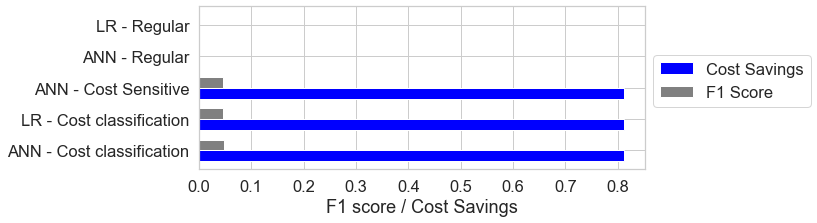

In [47]:
# All results: cost savings and F1-score
df_results.index = ['LR - Regular','ANN - Regular','ANN - Cost Sensitive', \
                    'LR - Cost classification','ANN - Cost classification']
df_results.columns = ['Cost Savings', 'F1 Score']

fig, ax = plt.subplots()
plt.rcParams.update({'figure.figsize': [8, 5], 'font.size': 22})
plt.rcParams.update({'font.size': 20, 'figure.figsize': [10,8]})
ax = df_results[::-1].plot.barh(ax=ax, color=['blue', 'gray'], width=0.7)
ax.legend(bbox_to_anchor=(1, 0.75))
ax.set_xlabel('F1 score / Cost Savings')
plt.show()

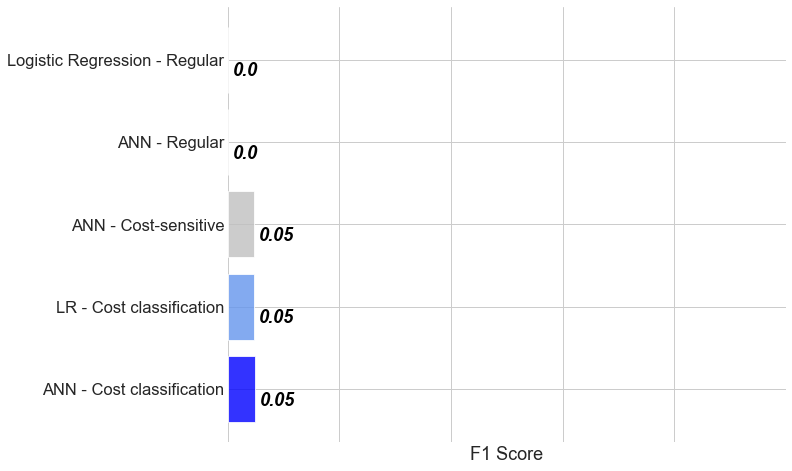

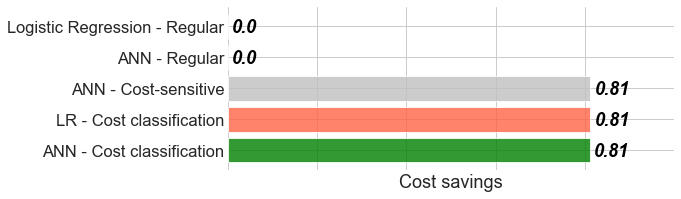

In [48]:
# LR regular + ANN regular + ANN cost sensitive + LR cost classification + ANN cost classification
fontsize = 18
df_5_f1 = df_results.iloc[:, 1]
fig, ax = plt.subplots()
plt.rcParams.update({'font.size': fontsize, 'figure.figsize': [8, 3]})
ax.barh(['ANN - Cost classification', 'LR - Cost classification', 'ANN - Cost-sensitive',\
         'ANN - Regular', 'Logistic Regression - Regular'], df_5_f1[::-1], \
        color=['blue', 'cornflowerblue', 'silver', 'silver', 'silver'], alpha=0.8)
ax.set_xlim([0, 1])
ax.set_xlabel('F1 Score')
labels = list(df_5_f1[:].apply(lambda x: np.round(x, 2)))[::-1]
rects = ax.patches
for rect, label in zip(rects, labels):
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    ax.text(x_value + 0.01, y_value - 0.2, label, color='black', fontsize=fontsize, style='italic', weight='bold')#,
plt.setp(ax.get_xticklabels(), visible=False)
ax.tick_params(top=False, bottom=False, right=False, axis='both', which='both', length=0)
plt.box(False)
plt.show()

df_5_cs = df_results.iloc[:, 0]
fig, ax = plt.subplots()
ax.barh(['ANN - Cost classification', 'LR - Cost classification', 'ANN - Cost-sensitive', \
         'ANN - Regular', 'Logistic Regression - Regular'], df_5_cs[::-1], \
        color=['green', 'tomato', 'silver', 'silver', 'silver'], alpha=0.8)
ax.set_xlim([0, 1])
ax.set_xlabel('Cost savings')
labels = list(df_5_cs[:].apply(lambda x: np.round(x, 2)))[::-1]
rects = ax.patches
for rect, label in zip(rects, labels):
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    ax.text(x_value + 0.01, y_value - 0.2, label, color='black', fontsize=fontsize, style='italic', weight='bold')#,
plt.setp(ax.get_xticklabels(), visible=False)
ax.tick_params(top=False, bottom=False, right=False, axis='both', which='both', length=0)
plt.box(False)
plt.show()